In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras import Sequential
import matplotlib.pyplot as plt
import time

# Problem 2
Implement a multi-layer fully connected neural network:  
• Input: 1-channel input, size 28x28  
• Fully connected layer 1: input with bias; output - 128 nodes
• ReLU activation function  
• Fully connected layer 2: input - 128 nodes; output - 10 nodes   
• Softmax activation function  
• Use cross entropy as the loss function  
• Use SGD as optimizer  
• Set mini batch size as 32  

Train using mini batches of the given batch size. Plot the cumulative training loss and accuracy for every epoch. Once training is complete, apply the learned model to the test set and report the testing accuracy.
Epoch: An epoch is a single pass through all the training data. Typically many epochs will be run when training a neural network before it converges.

11501568/11490434 [==============================] - 0s 0us/step
Epoch 1/100
1865/1875 [============================>.] - ETA: 0s - loss: 0.4066 - accuracy: 0.8836
Epoch 1: accuracy improved from -inf to 0.88383, saving model to best_model
INFO:tensorflow:Assets written to: best_model/assets
1875/1875 [==============================] - 11s 5ms/step - loss: 0.4059 - accuracy: 0.8838
Epoch 2/100
1859/1875 [============================>.] - ETA: 0s - loss: 0.2326 - accuracy: 0.9363
Epoch 2: accuracy improved from 0.88383 to 0.93627, saving model to best_model
INFO:tensorflow:Assets written to: best_model/assets
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2326 - accuracy: 0.9363
Epoch 2: early stopping
313/313 [==============================] - 1s 2ms/step - loss: 0.2838 - accuracy: 0.9261
Test Accuracy:  0.9261000156402588


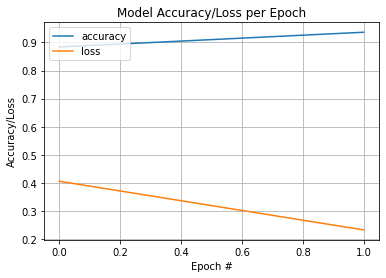

In [ ]:
def neural_net():
  # Data
  mnist = tf.keras.datasets.mnist
  (X_train, y_train), (X_test, y_test) = mnist.load_data()

  # Rescale
  X_train = X_train / 255.0
  X_test = X_test / 255.0

  # Sequential model
  model = keras.Sequential([
                            keras.layers.Flatten(input_shape=(28, 28)),  # Input layer
                            keras.layers.Dense(128, activation='relu', use_bias = True),  # Hidden layer 1
                            keras.layers.Dense(10, activation='softmax'), # Output layer
                            ])
  
  # Optimizer
  opt = tf.optimizers.SGD(learning_rate= 1)
  model.compile(optimizer= opt,
            loss = 'sparse_categorical_crossentropy',
            metrics=['accuracy'])

  # Callbacks for convergence criterion
  es = tf.keras.callbacks.EarlyStopping(monitor='loss', min_delta= 0.001, verbose=1)
  checkpoint = tf.keras.callbacks.ModelCheckpoint("best_model", monitor = 'accuracy' ,verbose = 1, mode = 'max', save_best_only = True)
  callbacks = [es, checkpoint]
  
  # Fitting the model and reporting training and test accuracy
  history = model.fit(X_train, y_train, epochs = 100, callbacks = [es, checkpoint])
  test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=1) 
  print("="*100)
  print("Test Accuracy: ", test_acc)
  print("="*100)

  # Graphing: Epoch vs. Training Accuracy
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['loss'])
  plt.title('Model Accuracy/Loss per Epoch')
  plt.ylabel('Accuracy/Loss')
  plt.xlabel('Epoch #')
  plt.legend(['accuracy', 'loss'], loc='upper left')
  plt.grid()
  plt.show()


def main():
  neural_net()

if __name__ == "__main__":
  main()